In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [1]:
import pandas as pd
df = pd.read_csv("Covid 19 Indonesia.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Name','Item', 'Kind', 'Hidden'], axis = 1, inplace = True)
df


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.00,0.33
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.00,1.00
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.00,3.00
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,1783,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,47.05,4722.89,0.38,95.62,2.02%,83.65%,0.92,0.50
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,1327,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,105.23,6595.29,3.41,216.51,3.28%,89.10%,1.24,9.00
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,5576,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,130.09,10087.43,1.81,228.11,2.26%,87.72%,0.93,1.00
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,2490,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,41.50,3790.30,0.73,190.93,5.04%,86.97%,1.15,0.38


In [5]:
DMei = df.query('Date == "5/1/2021"')
DMei

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
13903,5/1/2021,ID-AC,Aceh,124,2,119,3,11169,442,9740,987,Province,NaN,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,23.63,2128.54,0.38,84.23,3.96%,87.21%,1.59,2.00
13904,5/1/2021,ID-BA,Bali,142,10,165,-33,44813,1346,42133,1334,Province,NaN,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,33.68,10628.84,2.37,319.25,3.00%,94.02%,1.04,1.67
13905,5/1/2021,ID-BT,Banten,53,0,28,25,47396,1210,44291,1895,Province,NaN,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,4.94,4420.29,0.00,112.85,2.55%,93.45%,0.74,0.00
13906,5/1/2021,ID-BE,Bengkulu,102,0,40,62,6884,172,5892,820,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,51.01,3442.79,0.00,86.02,2.50%,85.59%,2.37,1.00
13907,5/1/2021,ID-JK,DKI Jakarta,926,15,793,118,409542,6681,395842,7019,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,85.38,37759.22,1.38,615.98,1.63%,96.65%,1.17,3.75
13908,5/1/2021,ID-YO,Daerah Istimewa Yogyakarta,128,4,330,-206,39644,960,34866,3818,Province,NaN,Daerah Istimewa Yogyakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,35.25,10918.16,1.10,264.39,2.42%,87.95%,0.49,4.00
13909,5/1/2021,IDN,Indonesia,4512,131,4344,37,1672880,45652,1526978,100250,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,17.01,6308.34,0.49,172.15,2.73%,91.28%,0.82,0.70
13910,5/1/2021,ID-JA,Jambi,60,3,50,7,7730,114,6215,1401,Province,NaN,Jambi,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,17.18,2212.77,0.86,32.63,1.47%,80.40%,0.81,NaN
13911,5/1/2021,ID-JB,Jawa Barat,754,5,760,-11,281958,3750,247652,30556,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,16.70,6243.35,0.11,83.04,1.33%,87.83%,0.64,0.17
13912,5/1/2021,ID-JT,Jawa Tengah,198,20,231,-53,184533,8415,165718,10400,Province,NaN,Jawa Tengah,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,5.44,5074.60,0.55,231.41,4.56%,89.80%,0.50,0.27


In [3]:
Id = gpd.read_file("prov.shp")
Id.head()

ModuleNotFoundError: No module named 'geopandas'

In [7]:
df_merged = Id.set_index('NAME_1').join(DMei.set_index('Location'))
df_merged.head()

,NAME_0,KODE,geometry,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
NAME_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bangka Belitung,Indonesia,19,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gorontalo,Indonesia,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Riau,Indonesia,14,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...",5/1/2021,ID-RI,377.0,15.0,333.0,29.0,44654.0,1100.0,38658.0,4896.0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10.0,2.0,169.0,268.0,1591.0,87024.0,6074100.0,69.80,101.805109,0.511648,62.07,7351.54,2.47,181.10,2.46%,86.57%,0.72,1.07
DKI Jakarta,Indonesia,31,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...",5/1/2021,ID-JK,926.0,15.0,793.0,118.0,409542.0,6681.0,395842.0,7019.0,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.0,5.0,44.0,267.0,NaN,664.0,10846145.0,16334.31,106.836118,-6.204699,85.38,37759.22,1.38,615.98,1.63%,96.65%,1.17,3.75
Kepulauan Riau,Indonesia,21,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...",5/1/2021,ID-KR,180.0,1.0,111.0,68.0,11355.0,257.0,9761.0,1337.0,Province,NaN,Kepulauan Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,5.0,2.0,75.0,142.0,275.0,8202.0,1929400.0,235.24,108.261746,3.916346,93.29,5885.25,0.52,133.20,2.26%,85.96%,1.58,NaN


In [8]:
df_new = df_merged.reset_index(level=['NAME_1'])
df_new.head()

,NAME_1,NAME_0,KODE,geometry,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,Bangka Belitung,Indonesia,19,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gorontalo,Indonesia,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riau,Indonesia,14,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...",5/1/2021,ID-RI,377.0,15.0,333.0,29.0,44654.0,1100.0,38658.0,4896.0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10.0,2.0,169.0,268.0,1591.0,87024.0,6074100.0,69.80,101.805109,0.511648,62.07,7351.54,2.47,181.10,2.46%,86.57%,0.72,1.07
3,DKI Jakarta,Indonesia,31,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...",5/1/2021,ID-JK,926.0,15.0,793.0,118.0,409542.0,6681.0,395842.0,7019.0,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.0,5.0,44.0,267.0,NaN,664.0,10846145.0,16334.31,106.836118,-6.204699,85.38,37759.22,1.38,615.98,1.63%,96.65%,1.17,3.75
4,Kepulauan Riau,Indonesia,21,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...",5/1/2021,ID-KR,180.0,1.0,111.0,68.0,11355.0,257.0,9761.0,1337.0,Province,NaN,Kepulauan Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,5.0,2.0,75.0,142.0,275.0,8202.0,1929400.0,235.24,108.261746,3.916346,93.29,5885.25,0.52,133.20,2.26%,85.96%,1.58,NaN


In [9]:
df_new.rename(columns={'NAME_1': 'Prov', 'NAME_0': 'Country'}, inplace=True)
df_new.head()

,Prov,Country,KODE,geometry,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,Bangka Belitung,Indonesia,19,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gorontalo,Indonesia,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riau,Indonesia,14,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ...",5/1/2021,ID-RI,377.0,15.0,333.0,29.0,44654.0,1100.0,38658.0,4896.0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10.0,2.0,169.0,268.0,1591.0,87024.0,6074100.0,69.80,101.805109,0.511648,62.07,7351.54,2.47,181.10,2.46%,86.57%,0.72,1.07
3,DKI Jakarta,Indonesia,31,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ...",5/1/2021,ID-JK,926.0,15.0,793.0,118.0,409542.0,6681.0,395842.0,7019.0,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1.0,5.0,44.0,267.0,NaN,664.0,10846145.0,16334.31,106.836118,-6.204699,85.38,37759.22,1.38,615.98,1.63%,96.65%,1.17,3.75
4,Kepulauan Riau,Indonesia,21,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ...",5/1/2021,ID-KR,180.0,1.0,111.0,68.0,11355.0,257.0,9761.0,1337.0,Province,NaN,Kepulauan Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,5.0,2.0,75.0,142.0,275.0,8202.0,1929400.0,235.24,108.261746,3.916346,93.29,5885.25,0.52,133.20,2.26%,85.96%,1.58,NaN


In [10]:
df_new.duplicated().sum()

0

In [11]:
df_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Prov                         34 non-null     object  
 1   Country                      34 non-null     object  
 2   KODE                         34 non-null     int64   
 3   geometry                     34 non-null     geometry
 4   Date                         31 non-null     object  
 5   Location ISO Code            31 non-null     object  
 6   New Cases                    31 non-null     float64 
 7   New Deaths                   31 non-null     float64 
 8   New Recovered                31 non-null     float64 
 9   New Active Cases             31 non-null     float64 
 10  Total Cases                  31 non-null     float64 
 11  Total Deaths                 31 non-null     float64 
 12  Total Recovered              31 non-null     float64 
 13 

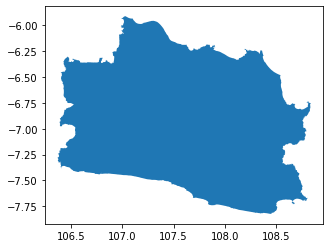

In [12]:
df_new[df_new.Prov=="Jawa Barat"].plot()

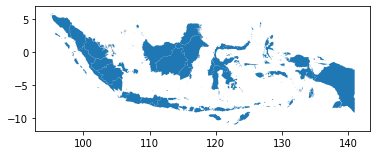

In [21]:
df_new.plot()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


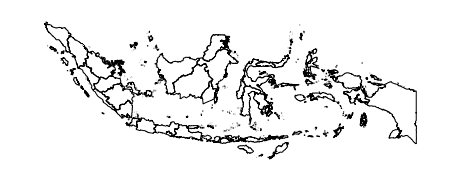

In [22]:
gplt.polyplot(Id)

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:67: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


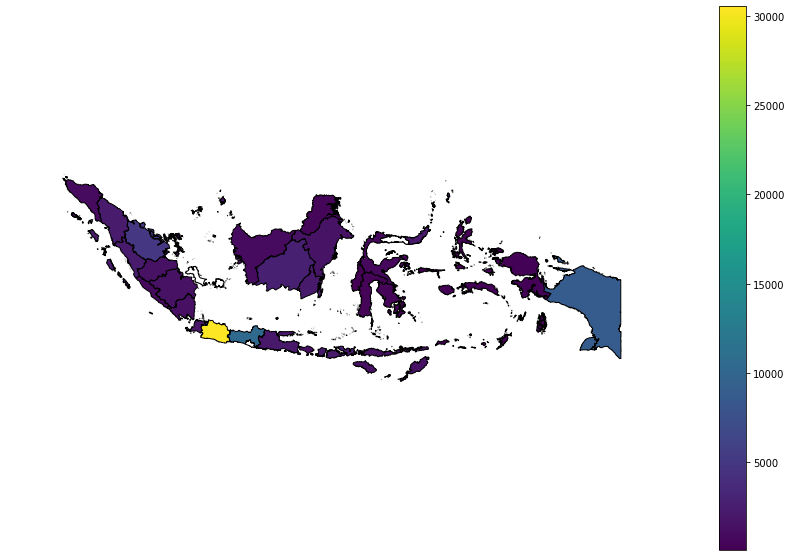

In [39]:
gplt.choropleth(df_new[["geometry", "Prov"]], hue=df_new["Total Active Cases"], legend = True,
                figsize=(15,10))